Problem Statement

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

The task involves analyzing a dataset of **Scaler learners** to identify and group them based on their job profiles, companies, and other relevant features. Here's what this scenario means:

### Key Points:
1. **Objective**:
   - To **profile the best companies and job positions** by grouping learners into clusters with similar attributes.
   - The ultimate goal is to extract meaningful insights, such as identifying trends, common characteristics, or preferences among learners in similar roles or companies.

2. **What You're Profiling**:
   - **Job profiles**: Roles like Software Engineer, Data Scientist, Product Manager, etc.
   - **Companies**: Organizations learners are associated with, such as top tech companies, startups, etc.
   - **Other features**: Possibly data about salary, years of experience, location, skills, educational background, or performance.

3. **Why Clustering Learners?**
   - Clustering learners into groups with similar characteristics helps uncover patterns like:
     - Common job roles learners pursue.
     - Key attributes of learners at top companies.
     - Segments of learners needing additional training to land high-demand roles.
   - These insights can guide Scaler in improving its programs or targeting specific learners for career enhancement.

4. **Outcome**:
   - Clusters provide actionable insights into which companies and roles learners are most successful in.
   - Scaler can use these insights to better market their offerings, recommend career paths, or focus training on high-value roles.

### Example:
Imagine the data includes these features for learners:
- Job Role: Data Scientist
- Company: Google
- Skills: Python, ML, SQL
- Salary: 25 LPA
- Experience: 3 years

After clustering:
- Cluster A: Data Scientists in top-tier companies like Google, Microsoft, Amazon.
- Cluster B: Software Engineers in startups focusing on backend development.
- Cluster C: Freshers targeting entry-level roles in AI/ML.

This segmentation helps Scaler identify which learner profiles succeed where and what traits define them.

Data Dictionary:

‘Unnamed 0’ - Index of the dataset<br>
Email_hash - Anonymised Personal Identifiable Information (PII)<br>
Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.<br>
orgyear - Employment start date<br>
CTC - Current CTC<br>
Job_position - Job profile in the company<br>
CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)
<br>

Concept Used:

Manual Clustering
Unsupervised Clustering - K- means, Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [4]:
df.nunique()

,0
Unnamed: 0,205843
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,1016
ctc_updated_year,7


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.duplicated().sum()

34

In [7]:
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
97138,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,NaN,2019.0
102600,voxvz uvxzno,c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...,2020.0,1280000,NaN,2019.0
109324,wgbwvon mhoxztoo,0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...,2016.0,700000,NaN,2019.0
110833,zgn vuurxwvmrt vwwghzn,8aad76cb5766c6b24c8eebfeb891cb548420690d0030a0...,2019.0,500000,NaN,2021.0
111354,uyxrxuo xzzgcvnxgz wvbuho,704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...,2017.0,850000,iOS Engineer,2019.0
111521,aqggb ntwyzgrgsj,df81dac132d66a42a0c71a4799e1040731738e542c81ff...,2017.0,1270000,FullStack Engineer,2019.0
115241,rgfto wgbuvzxto xzw,ea363e930dabe0fbb63438e07775af3cb3b32639947c47...,2017.0,1100000,Backend Engineer,2019.0
117246,xatbxv,f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...,2019.0,640000,NaN,2019.0
117549,exzdtqv,e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...,2020.0,1500000,NaN,2020.0


In [8]:
df.iloc[109324,1]

'0442a51ef5080d7d40721c007131a1d5bdeabae2c1b1537b5d472a937b6ab5cb'

In [9]:
df[df['email_hash']=='71aa46088d2a416970bb7620dbed05b7f0bfcebf9d349360bb2404ae6cee0bf6']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
80494,vxqntr drvmo,71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...,2016.0,2500000,Backend Engineer,2021.0
109328,vxqntr,71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...,2016.0,1800000,NaN,2020.0
117390,vxqntr drvmo,71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...,2016.0,2500000,NaN,2021.0


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isna().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52548
ctc_updated_year,0


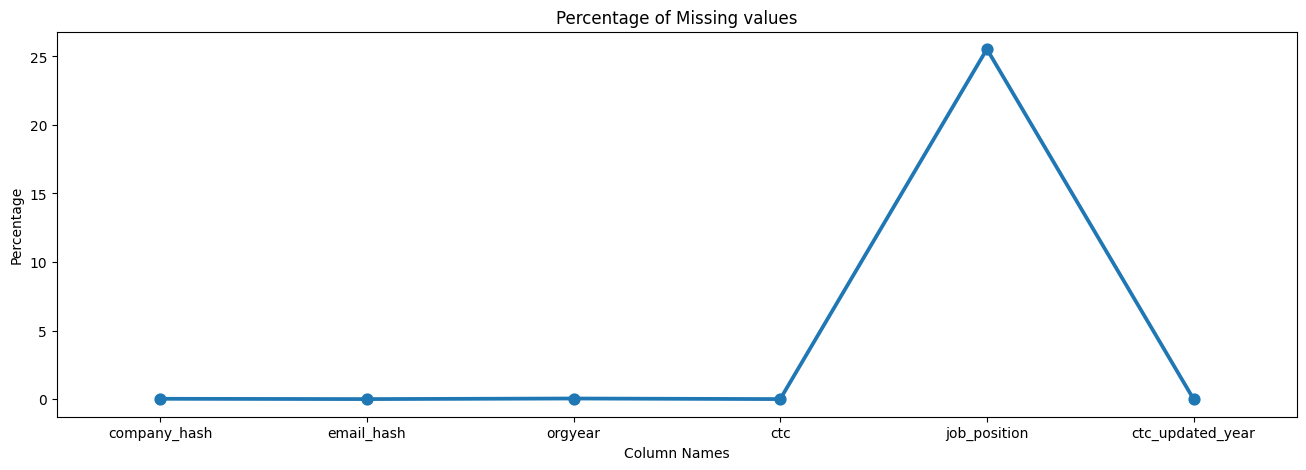

In [12]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)          # column name=0
plt.xticks(fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.xlabel("Column Names")
plt.show()

In [66]:
df.email_hash.value_counts().head(10)

,count
email_hash,
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,8
5dcd62ab1a606642f3dde6f536f5a343a8e943f215c463f945dd1bad9bff1531,7
021ea9c97b6b287336e9345f39f9308c33ccbd15ac366d5f26f60032097ec26c,7
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,7
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,7


In [14]:
df[df['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


In [15]:
df.drop(columns=['job_position']).duplicated().sum()

38948

As we can see if we remove the Job_positions, there will be **39948** duplicate instances. So there is a possibility that a person can work for many roles which are integrated into each other but instead of nesting them, these are shown as different rows.

In [16]:
df['job_position'].value_counts().head(10)

,count
job_position,
Backend Engineer,43546
FullStack Engineer,24711
Other,18071
Frontend Engineer,10417
Engineering Leadership,6870
QA Engineer,6587
Data Scientist,5367
Android Engineer,5356
SDET,4967


In [17]:
df[df['job_position'].str.contains('Software',case=False, na=False)]['job_position'].value_counts()

,count
job_position,
Senior Software Engineer,55
Software Engineer (Backend),42
Software Engineer 2,22
Associate Software Engineer,18
Software Engineer,17
...,...
Senior Software Development Engineer (Backend),1
Software Enginnering Specialist,1
Senior Engineer Software,1


As we can see there are different job_positions like SDE1, SDE2, software engineer, senior software engineer, software engineer 2 etc, which can be a single role, so lets integrate them into one. Bu tbefor that lets try to fill null values in tgis column.

In [18]:
df['job_position'].isna().sum()

52548

In [164]:
def fill_with_mode(group):
    mode_job = group['job_position'].mode()
    return group['job_position'].fillna(mode_job[0] if not mode_job.empty else 'Unknown')

In [20]:
df['job_position']=df.groupby('email_hash').apply(fill_with_mode).reset_index(level=0, drop=True)

In [21]:
df['job_position'].isna().sum()

0

In [22]:
df['job_position'].value_counts()

,count
job_position,
Backend Engineer,53985
FullStack Engineer,31110
Other,22110
Unknown,21155
Frontend Engineer,12775
...,...
Big data Developer,1
Data Specialist,1
Senior System Engineer,1


In [23]:
import re

def clear_feat(col_data):
    new_data=re.sub('[^A-Za-z ]+', '', col_data)
    return new_data

In [24]:
df['job_position']=df['job_position'].apply(clear_feat)
df['job_position']=df['job_position'].str.strip().str.lower()
df['job_position']

,job_position
0,other
1,fullstack engineer
2,backend engineer
3,backend engineer
4,fullstack engineer
...,...
205838,unknown
205839,unknown
205840,unknown
205841,unknown


In [25]:
df.duplicated().sum()

26821

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(178988, 6)

In [28]:
df['job_position'].nunique()

856

In [29]:
df['job_position'].value_counts().iloc[:235]

,count
job_position,
backend engineer,45575
fullstack engineer,26812
unknown,21155
other,18562
frontend engineer,10715
...,...
mainframe developer,2
research analyst,2
insurance agent,1


We can see there are only 232 job_positions which have atleast 2 users, remaining 624 roles are those for which only 1 learner is there, which shows that learners belonging to these roles are negligible or kind of outliers.
Lets see if these roles have any particular features.

In [30]:
# Use replace with a loop through the dictionary for multiple replacements.
replace_dict = {'r  d engineer':'rd engineer',
                'softwear':'software',
                'sw':'software',
                'sofware':'software',
                'mgr':'manager',
                'front end':'frontend',
                'back end':'backend',
                'devlopment':'development',
                'full stack':'fullstack',
                'reasearch':'research',
                'credit':'credits',
                'it ':'IT  ',
                'eingineer':'engineer',
                'analayst':'analyst',
                'enginner':'engineer',
                'devloper':'developer',
                'unempolyed':'unemployed',
                'maricketing':'marketing',
                'engineet':'engineer'
                }

for old_value, new_value in replace_dict.items():
    df['job_position'] = df['job_position'].str.replace(old_value, new_value)


    # find those words that may be misspelled
#from spellchecker import SpellChecker

#spell = SpellChecker()

#misspelled = spell.unknown(list(df['company'].values)[:10])
#dicter={}
#for word in misspelled:
    # Get the one `most likely` answer
#    dicter[word]=spell.correction(word)

#print(dicter)



In [31]:
def categorize_job(title):
    if 'intern' in title or 'trainee' in title:
        return 'Internship'
    elif any(keyword in title for keyword in['ceo','founder','entrepreneur','cto']):
        return 'Top Officials'
    elif 'analyst' in title or 'analytics' in title:
        return 'Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif any(keyword in title for keyword in ['research','rd ',' rd','scientist']):
        return 'Research'
    elif 'data' in title and 'engineer' in title:
        return 'Data Engineer'
    elif any(keyword in title for keyword in ['facilitator','teacher','teaching','lecturer','pgt','professor','faculty']):
        return 'Teaching'
    elif any(keyword in title for keyword in ['test','qa','qc','automation']):
        return 'Quality Assurance and Testing'
    elif any(keyword in title for keyword in ['software','sde','developer','programmer']):
        return 'Software'
    elif any(keyword in title for keyword in ['manager','leader','head','director','lead','executive','president']):
        return 'Management'
    elif any(keyword in title for keyword in ['mobile','ios','flutter','android']):
        return 'Mobile Engineer'
    elif any(keyword in title for keyword in ['machine learning', 'ml', 'm l','aiml','ai']):
        return 'ML Engineer'
    elif any(keyword in title for keyword in['learning','no job','student','fresher', 'graduate', 'not employed','unemployed']):
        return 'Fresher'
    elif 'frontend' in title or 'web' in title:
        return 'Frontend Engineer'
    elif any(keyword in title for keyword in ['backend','application','integration']):
        return 'Backend Engineer'
    elif any(keyword in title for keyword in ['support','technical','escalation','services','release','pop', 'risk investigator','power plant','fibre','highway','room','mechanical']):
        return 'Support & Maintenance Engineer'
    elif any(keyword in title for keyword in['cyber','IT','iaas','cloud','techops','server','ware','devops','system','performance','radio']):
        return 'IT and Cyber Security'
    elif any(keyword in title for keyword in['product','solution','project','fullstack','implementation','development','platform','design','engineer']):
        return 'Product Development'
    elif any(keyword in title for keyword in['database administrator','oracle dba','linux administrator','network administrator']):
        return 'Database Administration'
    elif any(keyword in title for keyword in ['talent','human','chief people','consul']):
        return 'Human Resources'
    elif any(keyword in title for keyword in ['administrat', 'associate','data','technology']):
        return 'Operations/Administrative Roles'
    elif 'unknown' in title:
        return 'Unknown'
    else:
      return 'Non Technical Roles'

df['job_category'] = df['job_position'].apply(categorize_job)
df['job_category'].value_counts()

,count
job_category,
Backend Engineer,46916
Product Development,28255
Unknown,21155
Non Technical Roles,19318
Frontend Engineer,10725
Management,9190
Mobile Engineer,8262
Quality Assurance and Testing,6708
Software,5728


In [37]:
df[df['job_category']=='Non Technical Roles']['job_position'].value_counts().head(15)

,count
job_position,
other,18562
non coder,601
,9
mts,9
na,5
no,4
ase,3
sales,3
driver,2


In [38]:
df.nunique()

,0
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,835
ctc_updated_year,7
job_category,23


In [39]:
df.isna().sum()

,0
company_hash,39
email_hash,0
orgyear,84
ctc,0
job_position,0
ctc_updated_year,0
job_category,0


# new_df

In [67]:
df_new=df.copy()

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178988 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      178949 non-null  object 
 1   email_hash        178988 non-null  object 
 2   orgyear           178904 non-null  float64
 3   ctc               178988 non-null  int64  
 4   job_position      178988 non-null  object 
 5   ctc_updated_year  178988 non-null  float64
 6   job_category      178988 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.9+ MB


In [68]:
df_new[df_new.drop(['job_position'],axis=1).duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,job_category
4718,bxwqgogen,dceb289be0e23a77c5a02d193997abc3109e8805101777...,2011.0,6900000,backend architect,2019.0,Backend Engineer
5110,avzopt xn,3d6fb1d08f0e6129d97089626f33ca3747a9d495291723...,2005.0,4400000,architect team lead,2021.0,Management
9854,vwwgrxnt ogenfvqt xzaxv ucn rna,e384a1c1bce518ec3962ed3da2b626a007edf66cce2458...,2011.0,2100000,backend engineer,2020.0,Backend Engineer
10014,lvjutt xzonxnhnt ge xzegqbvnxgz ntwyzgrgsjzgxav,e83088332191a14dfaa9131eeafb4f596809c34b8520c2...,2018.0,200000,backend architect,2019.0,Backend Engineer
10397,ovx trtwnqxwvro,7d021961cae2b6eaacce2c09ecaa75320654f8b63ef2c5...,2016.0,860000,product manager,2020.0,Management
...,...,...,...,...,...,...,...
202157,xmb xzaxv uqxcvnt rxbxnta,ea3b6c66270fb97616a8315fe203314a033da841ab4793...,2016.0,1675000,backend architect,2019.0,Backend Engineer
202182,gqvwrt,be83bbdb1a0909062489156ed76be3a9ce815274339a81...,2008.0,2000000,backend architect,2019.0,Backend Engineer
202524,ouqxzsbr,ee5ab46320f580d8b5bf508bb75df74d6cbca13f963cd5...,2011.0,1800000,backend architect,2021.0,Backend Engineer
203432,ytfrtnn uvwpvqa tzntquqxot,a566e153d1fafc0be8d4a28038fd4616d09a97a32ab0c5...,2016.0,200000,non coder,2021.0,Non Technical Roles


 We are not much worried about the change in level of a person but in the domain of the person job profile as a whole so dropping job position column as these are binned into job category.

In [69]:
df_new.drop(columns=['job_position'],inplace=True)

In [70]:
df_new.drop_duplicates(inplace=True)

In [45]:
df_new.shape

(178579, 6)

In [46]:
df_new.nunique()

,0
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
ctc_updated_year,7
job_category,23


In [47]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,178495.0,2.014762e+03,6.808224e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,178579.0,2.395110e+06,1.236992e+07,2.0,550000.0,990000.0,1700000.0,1.000150e+09
ctc_updated_year,178579.0,2.019500e+03,1.338972e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [48]:
df_new.describe(include='object').T

,count,unique,top,freq
company_hash,178540,37299,nvnv wgzohrnvzwj otqcxwto,6556
email_hash,178579,153443,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,9
job_category,178579,23,Backend Engineer,46728


In [72]:
df_new['ctc_updated_year'].value_counts()

,count
ctc_updated_year,
2019.0,64350
2021.0,47091
2020.0,44619
2017.0,7461
2018.0,6727
2016.0,5438
2015.0,2893


<Axes: ylabel='proportion'>

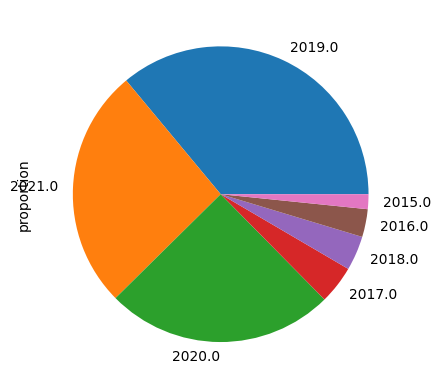

In [108]:
df_new['ctc_updated_year'].value_counts(normalize=True).plot(kind='pie')

In [73]:
df_new['joining_year']=df_new['orgyear']
df_new.loc[df_new['joining_year']>2021,'joining_year']=np.nan

In [52]:
df_new.joining_year.isna().sum()

1230

In [74]:
min_org_year=df_new.groupby('email_hash')['joining_year'].transform('min')
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

,0
company_hash,39
email_hash,0
orgyear,84
ctc,0
ctc_updated_year,0
job_category,0
comp_emp,39
joining_year,1171


In [75]:
min_org_year=df_new.groupby('email_hash')['ctc_updated_year'].transform('min')
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

,0
company_hash,39
email_hash,0
orgyear,84
ctc,0
ctc_updated_year,0
job_category,0
comp_emp,39
joining_year,0


In [76]:
df_new[df_new['joining_year']<1990]['joining_year'].value_counts().sort_index()

,count
joining_year,
0.0,17
1.0,2
2.0,3
3.0,6
4.0,1
5.0,2
6.0,2
38.0,1
83.0,1


- I am assuming the minimum joining year of a company is 1990 as 2021 is recent year and minimum is 2015 in data and a learner with such high experience(25-31) doesnt seems reasonable. Also there is incorrect entry in data, so clippping data to 1990.
- As maximum date is 2021 in ctc updated column, I am assuming data is available till that date and to find experience, I am again assuming that noone left the work so finding it till 2021.

In [77]:
df_new.loc[df_new['joining_year']<=1990,'joining_year']=1991
df_new['experience_years']=2021-df_new['joining_year']
df_new['experience_years'].value_counts().sort_index()

#ctc_updated_year_check
# df['ctc_updated_year'] = df.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] <
                    #  x['orgyear'] else x['ctc_updated_year'], axis=1)       should be done this way only

,count
experience_years,
0.0,3767
1.0,11466
2.0,19234
3.0,21595
4.0,20027
5.0,20178
6.0,18185
7.0,14890
8.0,11076


In [157]:
df_new.drop('orgyear',axis=1,inplace=True)

In [101]:
df_new.email_hash.value_counts().head(10)

,count
email_hash,
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,8
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,7
f5279f186abfb98a09d85a4467b99863c0bfc91c1147e542d6d23a6a69c9a7be,7
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,7
caf66f38a8e742b7690dceb5b02d81ad8be684cfb6dd29b639a385b83748110b,7


In [102]:
df_new[df_new.email_hash=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_category,comp_emp,joining_year,experience_years
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020.0,Product Development,11.0,2018.0,3.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020.0,Support & Maintenance Engineer,11.0,2018.0,3.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020.0,Non Technical Roles,11.0,2018.0,3.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020.0,Analyst,11.0,2018.0,3.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019.0,Non Technical Roles,11.0,2018.0,3.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019.0,Support & Maintenance Engineer,11.0,2018.0,3.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019.0,Product Development,11.0,2018.0,3.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019.0,IT and Cyber Security,11.0,2018.0,3.0


In [100]:
df_new.email_hash.value_counts().iloc[20700:20750]

,count
email_hash,
c46c96123d87555dda7f94aa9ffdf0c5650a9d3f3476075593b218aa4f8e881e,2
0a43cdd08bd4b6e9f6d1a00dbe9ff677bac0abcb782726aa597a5e1343210014,2
8991f338487bb642707a2464cf1bb260b3a3647b6ecfd2f1762e334fa5b11770,2
025a0644560a195911fae51d9f80a7484ffca021bb3f0cbdd282ca098723ae55,2
4f329c5cc0576e2869473a71b465aa672c6c96d48b2029fadfa98a6cc67a578e,2
c19b16e81b50b1ed49c6a8249996eb45ac2ffff3a5117ed2b677156b6ed62c18,2
3bd8bf218009d02adca948e70a3a02238e9fc7f31116245368a9eb246faede40,2
c97ca840265241d6c2885363180f5e605d758293135442ef9b682b00d4a4f482,2
a23f9bfdc5939b383188217a9f46f6fd78bd15c596aa659befe60cfcd4e585e8,2


As we can see there are 20,700 + users who have many years data and even 10000 something with 5-9 rows of data.<br>
I am not sure of if the data is collected on date when learner joining the **Scaler** or later or before some time. So, I am assuming it to be on the joining date. So will be taking last ctc updated date and ctc as average to get their values more logical for further analysis.<br>
But lets first fill the missing values before aggregating data.


In [141]:
dff=df_new.copy().reset_index()
dff

,index,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_category,comp_emp,joining_year,experience_years
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,Non Technical Roles,9.0,2016.0,5.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,Product Development,349.0,2018.0,3.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,Backend Engineer,1.0,2015.0,6.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,Backend Engineer,55.0,2017.0,4.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,Product Development,5.0,2017.0,4.0
...,...,...,...,...,...,...,...,...,...,...
178574,205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,Unknown,17.0,2008.0,13.0
178575,205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,Unknown,94.0,2017.0,4.0
178576,205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,Unknown,132.0,2021.0,0.0
178577,205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,Unknown,1069.0,2019.0,2.0


In [142]:
le=LabelEncoder()
dff['job_category_label']=le.fit_transform(dff['job_category'])
dff['job_category_freq']=dff['job_category'].map(dff['job_category'].value_counts())
dff.drop(columns=['job_category'],inplace=True)
dff.head()

,index,company_hash,email_hash,orgyear,ctc,ctc_updated_year,comp_emp,joining_year,experience_years,job_category_label,job_category_freq
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,9.0,2016.0,5.0,13,19253
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,349.0,2018.0,3.0,15,28235
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,1.0,2015.0,6.0,1,46728
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,55.0,2017.0,4.0,1,46728
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,5.0,2017.0,4.0,15,28235


In [143]:
pipe=Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=5))])
dff_knn=pd.DataFrame(pipe.fit_transform(dff.drop(columns=['email_hash','company_hash'])),columns=dff.columns.difference(['email_hash','company_hash']))

In [144]:
dff_knn.isna().sum()

,0
comp_emp,0
ctc,0
ctc_updated_year,0
experience_years,0
index,0
job_category_freq,0
job_category_label,0
joining_year,0
orgyear,0


In [145]:
dff_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178579 entries, 0 to 178578
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   comp_emp            178579 non-null  float64
 1   ctc                 178579 non-null  float64
 2   ctc_updated_year    178579 non-null  float64
 3   experience_years    178579 non-null  float64
 4   index               178579 non-null  float64
 5   job_category_freq   178579 non-null  float64
 6   job_category_label  178579 non-null  float64
 7   joining_year        178579 non-null  float64
 8   orgyear             178579 non-null  float64
dtypes: float64(9)
memory usage: 12.3 MB


In [150]:
df_cleaned=pd.concat([dff_knn,dff[['email_hash','company_hash']]],axis=1)
df_cleaned[df_cleaned['company_hash'].isna()]

,comp_emp,ctc,ctc_updated_year,experience_years,index,job_category_freq,job_category_label,joining_year,orgyear,email_hash,company_hash
1107,-1.712084,0.106316,5.190420,0.373520,0.516833,1.176595,-1.176595,-0.868684,-1.468349,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...,NaN
2366,-1.690645,0.047563,-0.173414,-0.373324,-0.507324,0.705131,-0.705131,0.361165,-0.281944,1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...,NaN
3225,-1.676013,0.047563,-0.153204,-0.373324,-0.498749,0.705131,-0.705131,0.361165,-0.281944,66263f4942b046c67ae6e2570e7825c03792631a0b13f1...,NaN
4123,-1.660530,0.047563,-0.145119,0.373520,-0.163673,0.705131,-0.705131,-1.278634,1.462116,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214...,NaN
4499,-1.654006,0.076940,-0.169372,1.120364,0.625558,1.176595,-1.176595,0.361165,-0.281944,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...,NaN
11290,-1.534598,0.047563,-0.169372,1.120364,0.707103,0.705131,-0.705131,1.591014,-0.161209,ea4f735b9357e8086a42bacc1f64b18e98c3dd1ad81f60...,NaN
13945,-1.484779,-0.025878,-0.064278,1.120364,-0.068053,-0.473526,0.473526,-1.278634,1.462116,b4a56d1199bc569aabd30cba8ea7a86fbddc85211453ba...,NaN
17315,-1.416140,0.032875,-0.137035,1.120364,0.315885,0.469400,-0.469400,0.634464,0.288216,07a60d6e853852471b0963b78a0a3074532572a2580864...,NaN
20706,-1.349520,-0.069942,-0.031941,0.373520,-0.393259,-1.180721,1.180721,1.591014,-0.161209,bdce6736cc1d55a909a46aed9e0bfdcd7cd523bfcf9b63...,NaN
27376,-1.205319,0.047563,-0.175031,1.120364,1.061108,0.705131,-0.705131,1.591014,-0.161209,8e70184e76f9a29078e8ddd928d24582e096f5b1a63197...,NaN


Though Knn imputation may be helping in imputating some **NAN** values but i already filled the job_position using mode job_position of respective and remaining with null and orgyear with mode of that learner orgyear. So to keep the data in original form rather than scaled. I am prefering the data to drop those 39 **company_hash** null data rows.

In [197]:
# df_new.dropna(inplace=True)
df_new.isna().sum()

,0
company_hash,0
email_hash,0
ctc,0
ctc_updated_year,0
job_category,0
comp_emp,0
joining_year,0
experience_years,0
company_hash_clean,0


In [173]:
agg_fun={'ctc':'mean',
           'ctc_updated_year':'max',
           'experience_years':'max'}

df_grp=df_new.groupby(['email_hash','company_hash','job_category']).agg(agg_fun).reset_index()
df_grp

,email_hash,company_hash,job_category,ctc,ctc_updated_year,experience_years
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,Backend Engineer,3500000.0,2019.0,9.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,Backend Engineer,250000.0,2020.0,8.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,Product Development,1300000.0,2019.0,0.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,Product Development,2000000.0,2021.0,17.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,Unknown,3400000.0,2018.0,12.0
...,...,...,...,...,...,...
172272,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,tqxwoogz ogenfvqt wvbuho,Quality Assurance and Testing,3529999.0,2019.0,17.0
172273,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,trnqvcg,Unknown,1600000.0,2018.0,6.0
172274,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,znn avnv srgmvr atrxctqj otqcxwto,IT and Cyber Security,900000.0,2019.0,7.0
172275,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,zwq wgqugqvnxgz,Product Development,700000.0,2020.0,1.0


In [175]:
df_grp.nunique()

,0
email_hash,153411
company_hash,37299
job_category,23
ctc,3790
ctc_updated_year,7
experience_years,31


In [192]:
df_grp.groupby('email_hash')['company_hash'].nunique().value_counts()

,count
company_hash,
1,146550
2,6860
3,1


# Manual Clustering based on company, job position and years of experience

In [199]:
dict_comp=df_grp.groupby('company_hash')['email_hash'].nunique().to_dict()
df_grp['comp_emp']=df_grp['company_hash'].map(dict_comp)

In [200]:
# df_new['company_hash_clean']=df_new['company_hash'].mask(df_new['company_hash'].map(df_new['company_hash'].value_counts())<=5,'Small_companies')
df_grp['company_hash_clean']=df_grp['company_hash'].mask(df_grp['comp_emp']<=5,'Small companies')
df_grp['company_hash_clean'].value_counts()

,count
company_hash_clean,
Small companies,47623
nvnv wgzohrnvzwj otqcxwto,6128
xzegojo,4007
vbvkgz,2969
zgn vuurxwvmrt vwwghzn,2453
...,...
ho tzsxzttqxzs wgbuvzj,6
tzuyvot tztqsj,6
atrxctqj ytqg,6


In [201]:
df_cluster=df_grp.groupby(['company_hash_clean','job_category','experience_years'])['ctc'].describe()
df_cluster

count  \
company_hash_clean job_category                   experience_years          
1bs                Backend Engineer               2.0                 4.0   
                                                  3.0                 3.0   
                                                  4.0                 5.0   
                                                  5.0                 2.0   
                                                  6.0                 3.0   
...                                                                   ...   
zxztrtvuo          Product Development            4.0                 1.0   
                                                  5.0                 3.0   
                   Support & Maintenance Engineer 5.0                 1.0   
                   Unknown                        1.0                 7.0   
                                                  7.0                 1.0   

                                                                            mean  \
company_hash_clean job_category                   experience_years                 
1bs                Backend Engineer               2.0               1.093750e+06   
                                                  3.0               8.833333e+05   
                                                  4.0               1.222000e+06   
                                                  5.0               3.035000e+06   
                                                  6.0               2.243333e+06   
...                                                                          ...   
zxztrtvuo          Product Development            4.0               1.500000e+06   
                                                  5.0               8.993333e+05   
                   Support & Maintenance Engineer 5.0               1.200000e+06   
                   Unknown                        1.0               6.285714e+05   
                                                  7.0               1.275000e+06   

                                                                             std  \
company_hash_clean job_category                   experience_years                 
1bs                Backend Engineer               2.0               1.087332e+05   
                                                  3.0               1.258306e+05   
                                                  4.0               2.896895e+05   
                                                  5.0               1.011163e+06   
                                                  6.0               6.030202e+05   
...                                                                          ...   
zxztrtvuo          Product Development            4.0                        NaN   
                                                  5.0               3.131714e+05   
                   Support & Maintenance Engineer 5.0                        NaN   
                   Unknown                        1.0               2.176717e+05   
                                                  7.0                        NaN   

                                                                          min  \
company_hash_clean job_category                   experience_years              
1bs                Backend Engineer               2.0               1000000.0   
                                                  3.0                750000.0   
                                                  4.0                800000.0   
                                                  5.0               2320000.0   
                                                  6.0               1800000.0   
...                                                                       ...   
zxztrtvuo          Product Development            4.0               1500000.0   
                                                  5.0                575000.0   
                   Support & Maintenance Engineer 5.0               12

In [206]:
df_merged=df_grp.drop(columns=['email_hash','company_hash','comp_emp']).merge(df_cluster,on=['company_hash_clean','job_category','experience_years'],how='left')

In [207]:
# pd.set_option('display.float_format', '{:.2f}'.format)
df_merged

,job_category,ctc,ctc_updated_year,experience_years,company_hash_clean,count,mean,std,min,25%,50%,75%,max
0,Backend Engineer,3500000.00,2019.00,9.00,bxwqgogen,59.00,2930194.92,1715896.30,21000.00,2137500.00,2800000.00,3450000.00,8500000.00
1,Backend Engineer,250000.00,2020.00,8.00,Small companies,611.00,2757233.62,11804200.18,2000.00,700000.00,1250000.00,1800000.00,200000000.00
2,Product Development,1300000.00,2019.00,0.00,gunhb,5.00,1228200.00,342594.80,710000.00,1100000.00,1300000.00,1431000.00,1600000.00
3,Product Development,2000000.00,2021.00,17.00,bxwqgotbx wgqugqvnxgz,1.00,2000000.00,NaN,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00
4,Unknown,3400000.00,2018.00,12.00,fvrbvqn rvmo,3.00,3766666.67,321455.03,3400000.00,3650000.00,3900000.00,3950000.00,4000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172272,Quality Assurance and Testing,3529999.00,2019.00,17.00,Small companies,13.00,3563615.23,5742674.46,100000.00,1230000.00,2700000.00,3300000.00,22200000.00
172273,Unknown,1600000.00,2018.00,6.00,Small companies,397.00,3786413.09,50385366.36,5000.00,480000.00,800000.00,1300000.00,1000150000.00
172274,IT and Cyber Security,900000.00,2019.00,7.00,znn avnv srgmvr atrxctqj otqcxwto,3.00,716666.67,160727.51,600000.00,625000.00,650000.00,775000.00,900000.00
172275,Product Development,700000.00,2020.00,1.00,zwq wgqugqvnxgz,8.00,880000.00,270026.45,700000.00,700000.00,750000.00,930000.00,1400000.00


### Creating Designation based on CTC

In [214]:
conditions=[df_merged['ctc']<df_merged['50%'],df_merged['ctc']<=df_merged['75%'],df_merged['ctc']>df_merged['75%']]
choices=[3,2,1]
df_merged['Designation']=np.select(conditions,choices)
df_merged['Designation'].value_counts()

,count
Designation,
2,72712
3,62209
1,37356


In [213]:
df_merged['Designation'].value_counts(normalize=True)*100

,proportion
Designation,
1,46.08
3,36.11
2,17.81


In [222]:
# Create flag for class at Company & Job Position level
# merged_data['Class'] = merged_data.groupby(['company_hash', 'job_position'])['Flag'].transform('max')
df_merged.groupby([ 'company_hash_clean'])['Designation'].transform('mean').value_counts().sort_index()

# Create flag for tier at Company level
# merged_data['Tier'] = merged_data.groupby(['company_hash'])['Flag'].transform('max')

,count
Designation,
1.86,14
1.89,27
1.90,20
1.92,24
1.92,26
...,...
2.22,2969
2.22,1069
2.24,47623


Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]<br>
Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]<br>
Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]<br>
Based on the manual clustering done so far, answering few questions like:<br>
Top 10 employees (earning more than most of the employees in the company) - Tier 1<br>
Top 10 employees of data science in each company earning more than their peers - Class 1<br>
Bottom 10 employees of data science in each company earning less than their peers - Class 3<br>
Bottom 10 employees (earning less than most of the employees in the company)- Tier 3<br>
Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X<br>
Top 10 companies (based on their CTC)<br>
Top 2 positions in every company (based on their CTC)<br>
Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data<br>
Unsupervised Learning - Clustering<br>
Checking clustering tendency<br>
Elbow method<br>
K-means clustering<br>
Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)<br>
Insights from Unsupervised Clustering<br>
Provide actionable Insights & Recommendations for the Business.<br>
<br>
Evaluation Criteria (100 Points):
<br>
Define Problem Statement and perform Exploratory Data Analysis (10 points)<br>
Definition of problem (as per given problem statement with additional views)<br>
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.<br>
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)<br>
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.<br>
Illustrate the insights based on EDA<br>
Comments on range of attributes, outliers of various attributes<br>
Comments on the distribution of the variables and relationship between them<br>
Comments for each univariate and bivariate plots<br><br>
Data Pre-processing: (30 Points)<br>
Mean/ KNN Imputation<br>
Regex for cleaning company names<br>
Standardization & Encoding<br><br>
Manual Clustering: (30 Points)<br>
Creating Designation Flag & Insights<br>
Creating Class Flag & Insights<br>
Creating Tier Flag & Insights<br><br>
Unsupervised learning: (20 Points)<br>
Checking clustering tendency, Elbow method & K- means clustering<br>
Hierarchical Clustering<br><br>
Actionable Insights & Recommendations (10 Points)<br>

In [151]:
dff1=pd.get_dummies(df_new.reset_index(),columns=['job_category'],drop_first=True,dtype='int')
dff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178579 entries, 0 to 178578
Data columns (total 31 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   index                                         178579 non-null  int64  
 1   company_hash                                  178540 non-null  object 
 2   email_hash                                    178579 non-null  object 
 3   orgyear                                       178495 non-null  float64
 4   ctc                                           178579 non-null  int64  
 5   ctc_updated_year                              178579 non-null  float64
 6   comp_emp                                      178540 non-null  float64
 7   joining_year                                  178579 non-null  float64
 8   experience_years                              178579 non-null  float64
 9   job_category_Backend Engineer                 17